In [313]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

(80, 1)
(20, 1)
(80,)
(20,)


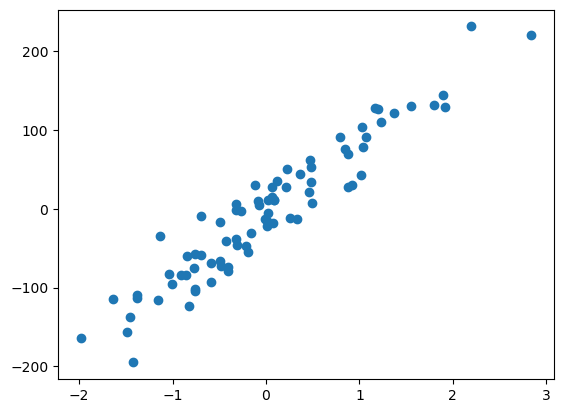

In [314]:
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=30,)

train_x = x[:-20]
test_x = x[-20:]

train_y = y[:-20]
test_y = y[-20:]
plt.scatter(train_x, train_y)

print(train_x.shape)
print(test_x.shape)

print(train_y.shape)
print(test_y.shape)

In [315]:
def loss_function(x_set, y_set, m):
    
    n = len(x_set)
    loss = 0

    for i in range(n):
        loss += 2*x_set[i] * (m*x_set[i] - y_set[i])

    loss = loss/n

    return loss

def parameter_update(learning_rate, train_x, train_y, initial_m=1000):

    # First pass
    previous_m = initial_m # Initial value for m
    error = 10
    iterations = 0
    loss = 0
    m_array = []

    while error > 0.001:
        previous_loss = loss
        loss = loss_function(train_x, train_y, previous_m)
        previous_m = previous_m - learning_rate * loss

        error = abs(previous_loss - loss)
        iterations += 1
        m_array.append(previous_m)

    print("Iterations: ", iterations)
    print("Error:", error)
    
    parameter_dict = {"m": previous_m, "iterations": iterations, "m_array": m_array}
    
    return parameter_dict    

Iterations:  433
Error: [0.00098956]
m:  [86.04873547]
Iterations:  433


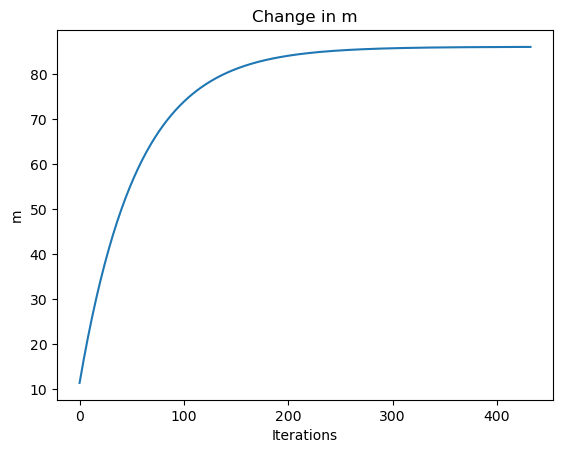

In [316]:
# Run the parameter update
learning_rate = 0.01
initial_m = 10

parameter_dict = parameter_update(learning_rate, train_x, train_y, initial_m)
m_array = parameter_dict["m_array"]
m = parameter_dict["m"]
iterations = parameter_dict["iterations"]

print("m: ", m)
print("Iterations: ", iterations)

# Plot the the change in m
plt.plot(m_array)
plt.xlabel("Iterations")
plt.ylabel("m")
plt.title("Change in m")
plt.show()

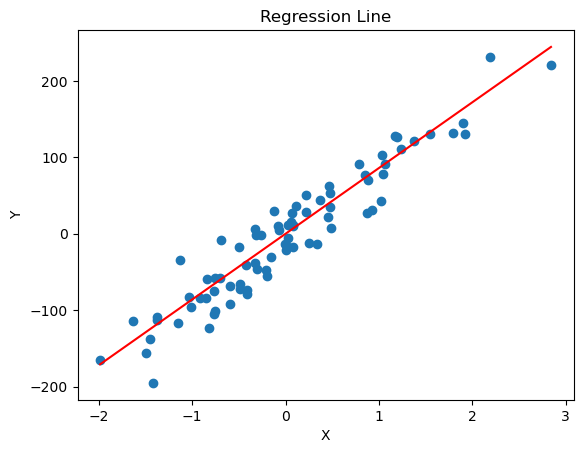

In [317]:
# Plot the regression line with the test data from the lowest x value to the highest x value
plt.scatter(train_x, train_y)
plt.plot([min(train_x), max(train_x)], [min(train_x)*m, max(train_x)*m], color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regression Line")
plt.show()

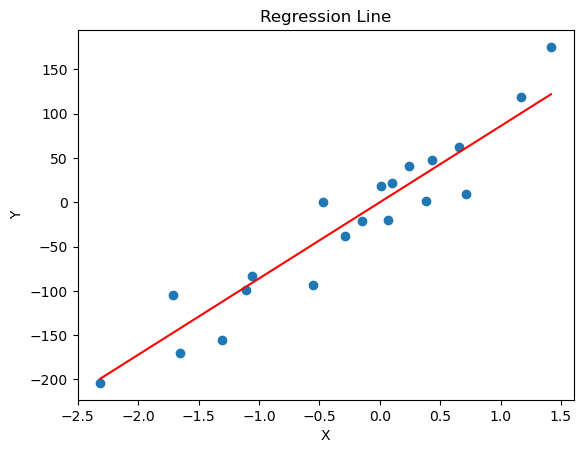

In [318]:
# Plot the regression line with the test data from the lowest x value to the highest x value
plt.scatter(test_x, test_y)
plt.plot([min(test_x), max(test_x)], [min(test_x)*m, max(test_x)*m], color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regression Line")
plt.show()

In [319]:
# Predict the y value for a given x value
def predict_y(m, x):
    return m*x

In [320]:
x = 1

prediction = predict_y(m, x)
print("Prediction: ", prediction)

Prediction:  [86.04873547]
